In [1]:
import numpy as np 
import PySO
import os
import corner 

In [2]:
#Simple gaussian to optimize/sample 
class High_dimensional_GaussianModel(PySO.Model):
    """
    An N dimensional Gaussian
    """
    
    names    = ['x'+str(i) for i in range(10)] 
    bounds   = [[-10,10]]*10
    periodic = [0, 0]
    def __init__(self,means):
        self.means = means
    def log_likelihood(self, param):
        params = np.array(list(param.values()))
        return -0.5*np.sum((params-self.means)**2)


In [3]:
means  = np.random.random(10)*10-5
model = High_dimensional_GaussianModel(means)
print('Means are: ',means)

Means are:  [-3.05318506 -0.67724339  0.08256769 -3.53094025 -2.8829363  -1.72999562
  0.17655718 -4.64309473  0.36665085  1.60973142]


In [6]:

NumParticles = 1000

outdir = 'High_dimensional_MH/'

myswarm = PySO.Swarm(model,
                     NumParticles,
                     Output = outdir,
                     Verbose = True,
                     nPeriodicCheckpoint = 1, # Final two args mean evolution is saved at every iteration. Only necessary if running myswarm.Plot()
                     SaveEvolution = True,    ############
                     Nthreads=5,
                     Tol = 1.0e-2,
                     Omega = 0, PhiP = 0, PhiG = 0, MH_fraction = 1.0, MaxIter=1000,)

# Clear any existing history file
history_file = os.path.join(outdir, "SwarmEvolutionHistory.dat")
if os.path.isfile(history_file): os.system('rm {}'.format(history_file))

myswarm.Run()

myswarm.PlotSwarmEvolution()

Iteration: 1, Max Value: -31.80595837764212 at [-3.83330993 -4.77783401 -2.71919093 -6.50051712 -0.68762526 -0.87039424
  1.31223986 -7.97146323  3.6893469   0.86554452], Spread: 410.959206480077
Iteration: 2, Max Value: -31.80595837764212 at [-3.83330993 -4.77783401 -2.71919093 -6.50051712 -0.68762526 -0.87039424
  1.31223986 -7.97146323  3.6893469   0.86554452], Spread: 410.959206480077
Iteration: 3, Max Value: -31.80595837764212 at [-3.83330993 -4.77783401 -2.71919093 -6.50051712 -0.68762526 -0.87039424
  1.31223986 -7.97146323  3.6893469   0.86554452], Spread: 399.4222723053303
Iteration: 4, Max Value: -31.80595837764212 at [-3.83330993 -4.77783401 -2.71919093 -6.50051712 -0.68762526 -0.87039424
  1.31223986 -7.97146323  3.6893469   0.86554452], Spread: 390.482902603997
Iteration: 5, Max Value: -24.894519467310715 at [-3.04414583 -1.94108423 -0.20548546 -0.1243966  -4.79230161 -0.15985961
 -1.76613106 -0.04405437  0.70110361  3.92405158], Spread: 358.6016759886788
Iteration: 6, Max

In [7]:
import pandas as pd 
pd = pd.read_csv('High_dimensional_MH/SwarmEvolutionHistory.dat')
pd

# particle_number        x0        x1        x2        x3        x4  \
0                        0  4.418189  5.500448  9.546502 -7.817954  6.794549   
1                        1  0.429486 -2.335001 -6.651445 -5.911069  0.429202   
2                        2  6.252699  9.258199  0.426555  9.925710  8.817993   
3                        3  8.489749  5.769825  2.464863 -5.468451 -1.947760   
4                        4  4.890612  7.894887  5.869532  3.212979  5.312005   
...                    ...       ...       ...       ...       ...       ...   
1000995                995 -3.056820 -3.462640  1.414092 -2.136191 -2.727338   
1000996                996 -4.184757 -1.379752  0.116422 -4.715046 -2.433637   
1000997                997 -3.225214 -0.368420 -1.593683 -2.845453 -0.833912   
1000998                998 -3.585431 -0.908012  1.350227 -3.737079 -2.393533   
1000999                999 -3.644117 -0.860520  1.121561 -3.696853 -2.173221   

               x5        x6        x7        x8        x9   function_value  
0       -9.118087  3.703306  8.498096  4.364763 -4.124658      -292.082209  
1        4.290111 -3.208673  8.118277 -0.645259 -1.815160      -150.083636  
2        4.071964  3.955616 -2.048376  1.938664  1.752813      -280.296154  
3       -9.780559 -1.274476  5.804968  3.546551  1.661177      -185.650661  
4       -0.482237  1.771040  1.466212 -6.714814 -4.017579      -202.974243  
...           ...       ...       ...       ...       ...              ...  
1000995 -2.289021 -0.446457 -5.928894 -1.137977  0.230630        -9.010351  
1000996 -2.257995  1.089816 -3.048798 -0.189763  1.265904        -3.730759  
1000997 -0.766304  0.335183 -5.272621 -0.515817  0.601657        -5.374153  
1000998 -0.076883  0.866987 -4.445624 -0.106820 -0.417666        -4.904245  
1000999 -1.076308  0.521396 -4.450054 -0.464983  2.320269        -1.886742  

[1001000 rows x 12 columns]

In [8]:
posterior = np.array([pd[' '+name].to_numpy() for name in model.names]).T
posterior.shape

(1001000, 10)

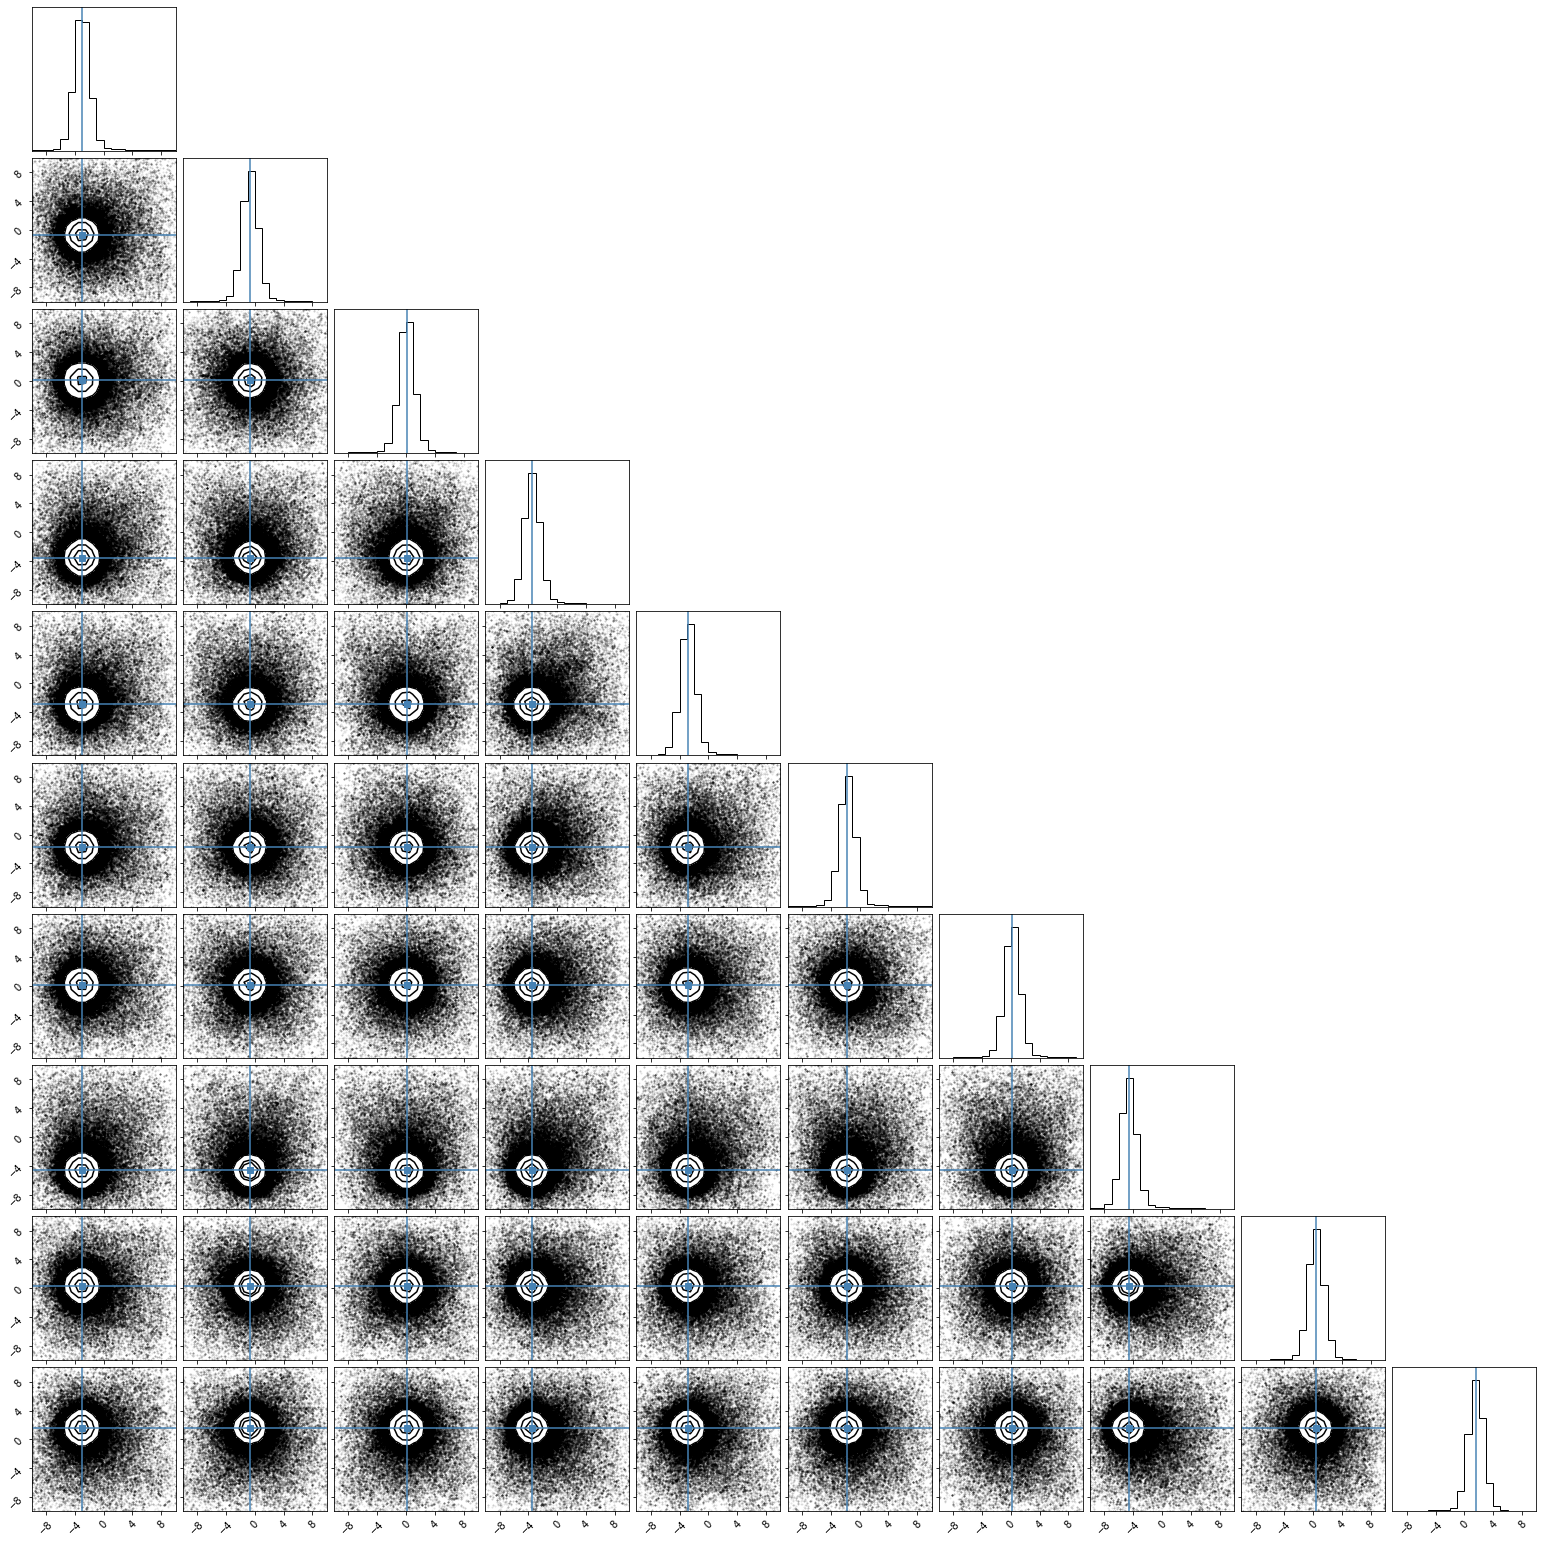

In [9]:
import corner
corner.corner(posterior,plot_density=False,truths=means)